### Demonstration of Data Collection / Extraction from various sources

As part of Data Scientist activities, Data collection or extraction is one of the steps which takes quite a good amount of time and effort 

###### For this particular Use Case, we are extracting state wise Covid-19 cases in USA from various sources 

#### There are multiple sources in which data is resided & a Data Scientist should be able to extract the data. Below are few sources
1.Website <br>
2.API <br>
3.Documents such as PDF <br>
4.RDBMS <br>

##### Exercise 1: To scrape the data from a website

In [212]:
# To supress the warnings
import warnings
warnings.filterwarnings("ignore")

In [213]:
# Import libraries
import requests
import numpy as np
import pandas as pd
from pathlib import Path

In [214]:
Data_URL = 'https://www.worldometers.info/coronavirus/country/us/'

r = requests.get(Data_URL)
print(f'Status: {r.status_code}') # Status: 200 states that the response is success from website

Status: 200


Documentation for BeautifulSoup library - https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [48]:
# Import BeautifulSoup
import bs4
from bs4 import BeautifulSoup as BS

page = BS(r.content, 'html.parser')
table = page.table

In [49]:
print(table.tbody.tr.prettify())

<tr class="total_row_usa">
 <td style="text-align:left;">
  USA Total
 </td>
 <td>
  4,634,985
 </td>
 <td>
 </td>
 <td>
  155,285
 </td>
 <td>
 </td>
 <td>
  2,194,735
 </td>
 <td>
  14,003
 </td>
 <td>
  469
 </td>
 <td>
  57,521,144
 </td>
 <td>
  173,778
 </td>
 <td>
 </td>
 <td>
 </td>
</tr>



In [92]:
from typing import List

def extract_from_table(table: bs4.element.Tag) -> List:
    '''Extracts data from HTML table.
    
    Input:  bs4 *table*
    Return: List of all the values in the table
    '''
    data = list()
    
    for row in table.select('tbody tr'):
        data.append([col.text for col in row.find_all('td')])
        
    return data

covid_data_table = extract_from_table(table)
covid_data_table[0:2]

[['USA Total',
  '4,634,985',
  '',
  '155,285',
  '',
  '2,194,735',
  '14,003',
  '469',
  '57,521,144',
  '173,778',
  '\xa0',
  '\xa0'],
 ['\nCalifornia ',
  '494,031 ',
  '\n',
  '\n9,003 ',
  ' ',
  '\n316,616 ',
  '12,503',
  '228',
  '\n7,633,840 ',
  '193,202',
  '\n[view by county]\xa0[1]\xa0 ',
  '\n[projections]\n']]

In [93]:
# Setting the column names 
columns = ['USA State','Total Cases','New Cases','Total Deaths','New Deaths','Active Cases','Total Cases per 1M pop','Deaths per 1M pop','Total Tests','Tests per 1M pop','View','projections']
covid_data_table = pd.DataFrame(covid_data_table, columns=columns)
covid_data_table.dtypes

USA State                 object
Total Cases               object
New Cases                 object
Total Deaths              object
New Deaths                object
Active Cases              object
Total Cases per 1M pop    object
Deaths per 1M pop         object
Total Tests               object
Tests per 1M pop          object
View                      object
projections               object
dtype: object

In [94]:
covid_data_table.head(2)

,USA State,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,View,projections
0,USA Total,"4,634,985",,"155,285",,"2,194,735","14,003",469,"57,521,144","173,778",,
1,\nCalifornia,"494,031",\n,"\n9,003",,"\n316,616","12,503",228,"\n7,633,840","193,202",\n[view by county] [1],\n[projections]\n


In [96]:
# Lets remove unwanted columns from the data set
cols=['New Cases','New Deaths','View','projections']
covid_data_table.drop(columns=cols,inplace=True)

In [97]:
covid_data_table.head(2)

,USA State,Total Cases,Total Deaths,Active Cases,Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop
0,USA Total,"4,634,985","155,285","2,194,735","14,003",469,"57,521,144","173,778"
1,\nCalifornia,"494,031","\n9,003","\n316,616","12,503",228,"\n7,633,840","193,202"


In [98]:
# Data Clean up 
# Below function iterates through every column in the df, to iterarte through each column
def cleanup_df():
    for col in covid_data_table.columns:
        print(col)
        covid_data_table[col]=covid_data_table[col].str.replace(',','') # Replacing commma with blank
        covid_data_table[col]=covid_data_table[col].str.replace('\n','',regex=True) # Replacing \n with blank
        covid_data_table[col]=covid_data_table[col].str.strip() # Stripping the unwanted spaces at the start & at the end of the values in the column
        covid_data_table.loc[covid_data_table[col] =='', col] = 0 # Assigning a value '0', where there are no values in the data set

In [99]:
# Calling the function
cleanup_df()

USA State
Total Cases
Total Deaths
Active Cases
Total Cases per 1M pop
Deaths per 1M pop
Total Tests
Tests per 1M pop


In [100]:
# All the columns are in string data type. Need to convert into 'int' data type to perform arithematic operations further
covid_data_table[['Total Cases','Total Deaths','Active Cases','Total Cases per 1M pop','Deaths per 1M pop','Total Tests','Tests per 1M pop']] = stats[['Total Cases','Total Deaths','Active Cases','Total Cases per 1M pop','Deaths per 1M pop','Total Tests','Tests per 1M pop']].astype(int)

In [101]:
covid_data_table.head(2)

,USA State,Total Cases,Total Deaths,Active Cases,Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop
0,USA Total,4634985,155285,2194735,14003,469,57521144,173778
1,California,494031,9003,316616,12503,228,7633840,193202


In [102]:
covid_data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   USA State               64 non-null     object
 1   Total Cases             64 non-null     int32 
 2   Total Deaths            64 non-null     int32 
 3   Active Cases            64 non-null     int32 
 4   Total Cases per 1M pop  64 non-null     int32 
 5   Deaths per 1M pop       64 non-null     int32 
 6   Total Tests             64 non-null     int32 
 7   Tests per 1M pop        64 non-null     int32 
dtypes: int32(7), object(1)
memory usage: 2.4+ KB


In [103]:
# Calculating the death rate at each state in US
covid_data_table['dead_rate'] = (covid_data_table['Total Deaths'] / covid_data_table['Total Cases'] * 100)
(stats
    .sort_values(by='dead_rate', ascending=False)   
    .head(5)
    .style
    .hide_index()
    .background_gradient(cmap='OrRd', subset='dead_rate')
)

USA State,Total Cases,Total Deaths,Active Cases,Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,dead_rate,cured_rate
Connecticut,49670,4431,20652,13932,1243,776775,217872,8.920878,58.421582
New Jersey,186975,15888,38974,21051,1789,2059564,231876,8.497393,79.155502
New York,443000,32754,106989,22772,1684,5820368,299193,7.393679,75.848984
Massachusetts,117098,8595,10908,16989,1247,1256671,182324,7.340006,90.684726
Michigan,89781,6443,25836,8990,645,2049316,205201,7.176351,71.223310


In [104]:
# Calculating the cured rate at each state in US
covid_data_table['cured_rate'] = ((covid_data_table['Total Cases'] - covid_data_table['Active Cases'])/ covid_data_table['Total Cases'] * 100)
(stats
    .sort_values(by='cured_rate', ascending=False)   
    .head(5)
    .style
    .hide_index()
    .background_gradient(cmap='YlGn', subset='cured_rate')
)

USA State,Total Cases,Total Deaths,Active Cases,Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,dead_rate,cured_rate
New Hampshire,6544,415,407,4813,305,185119,136146,6.341687,93.780562
Massachusetts,117098,8595,10908,16989,1247,1256671,182324,7.340006,90.684726
Minnesota,53692,1634,5093,9520,290,1007882,178714,3.043284,90.514416
South Dakota,8685,129,866,9817,146,110345,124732,1.485320,90.028785
Vermont,1407,57,143,2255,91,93284,149496,4.051173,89.836532


##### Exercise 2: To Pull the data from API

Notes for extracting the data from API <br>
To pull or access the data through API, need host & key for the API. There can be few public APIs with no authenticaion required. 

In [67]:
DATA_URL = 'https://rapidapi.com/ZermeloTechnologies/api/covid-19-usa-data-by-zt'

r = requests.get(DATA_URL)
print(f'Status {r.status_code}')

Status 200


In [68]:
url = "https://covid-19-usa-data-by-zt.p.rapidapi.com/GetUSStateWiseData"

headers = {
    'x-rapidapi-host': "covid-19-usa-data-by-zt.p.rapidapi.com",
    'x-rapidapi-key': "e4a0f5191dmsh32f12c91288b7ffp11a5adjsn38b664d6d513"
    }

response = requests.request("GET", url, headers=headers)

In [69]:
type(response)

requests.models.Response

In [70]:
# Extracting the data from the 'Response' variable.
api = response.json()

covid_data_usa = pd.DataFrame(api['data'])
covid_data_usa.head()

,code,name,active,deaths,tested,confirmed,newdeaths,newtested,recovered,newconfirmed,newrecovered,lastupdatedtime
0,MO,Missouri,47884,1255,675133,49139,16,14234,0,2197,0,2020-07-31 04:35:31
1,VT,Vermont,143,57,93284,1407,1,823,1207,1,8,2020-07-31 04:35:31
2,MN,Minnesota,5093,1634,1007882,53692,5,14791,46965,745,329,2020-07-31 04:35:31
3,DE,Delaware,5968,581,178863,14689,0,1847,8140,87,32,2020-07-31 04:35:31
4,MI,Michigan,25836,6443,1813178,89781,21,19945,57502,807,0,2020-07-31 04:35:31


In [71]:
covid_data_usa.shape

(50, 12)

Extracting new data from the other API

In [72]:
url = "https://covid-19-usa-data-by-zt.p.rapidapi.com/GetUSAllHistoricalData"

headers = {
    'x-rapidapi-host': "covid-19-usa-data-by-zt.p.rapidapi.com",
    'x-rapidapi-key': "e4a0f5191dmsh32f12c91288b7ffp11a5adjsn38b664d6d513"
    }

response1 = requests.request("GET", url, headers=headers)

In [73]:
api1 = response1.json()

covid_data2_usa = pd.DataFrame(api1['records'])
covid_data2_usa.head()

,dateofrecord,cases
0,2020-01-23,"{'dailytested': '0', 'totaltested': '0', 'dail..."
1,2020-01-24,"{'dailytested': '0', 'totaltested': '0', 'dail..."
2,2020-01-25,"{'dailytested': '0', 'totaltested': '0', 'dail..."
3,2020-01-26,"{'dailytested': '0', 'totaltested': '0', 'dail..."
4,2020-01-27,"{'dailytested': '0', 'totaltested': '0', 'dail..."


In [74]:
covid_data2_usa['cases'][0]

{'dailytested': '0',
 'totaltested': '0',
 'dailydeceased': '0',
 'totaldeceased': '0',
 'dailyconfirmed': '0',
 'dailyrecovered': '0',
 'totalconfirmed': '1',
 'totalrecovered': '0'}

In [75]:
covid_data2_usa.shape

(190, 2)

In [76]:
# Extracting the dictionary values from the column 'cases' in dataframe
covid_data2_temp=covid_data2_usa['cases'].apply(pd.Series)
covid_data2_usa=pd.concat([covid_data2_usa, covid_data2_temp],axis=1)

In [111]:
covid_data2_usa.tail()

,dateofrecord,cases,dailytested,totaltested,dailydeceased,totaldeceased,dailyconfirmed,dailyrecovered,totalconfirmed,totalrecovered
185,2020-07-26,"{'dailytested': '852519', 'totaltested': '5095...",852519,50958020,475,146136,55236,18443,4206119,1287745
186,2020-07-27,"{'dailytested': '757089', 'totaltested': '5171...",757089,51715109,1076,147212,56024,27850,4262143,1315595
187,2020-07-28,"{'dailytested': '728376', 'totaltested': '5244...",728376,52443485,1289,148501,65360,29492,4327503,1345087
188,2020-07-29,"{'dailytested': '836949', 'totaltested': '5328...",836949,53280434,1399,149900,70486,33993,4397989,1379080
189,2020-07-30,"{'dailytested': '815603', 'totaltested': '5409...",815603,54096037,1339,151239,67048,24676,4465037,1403756


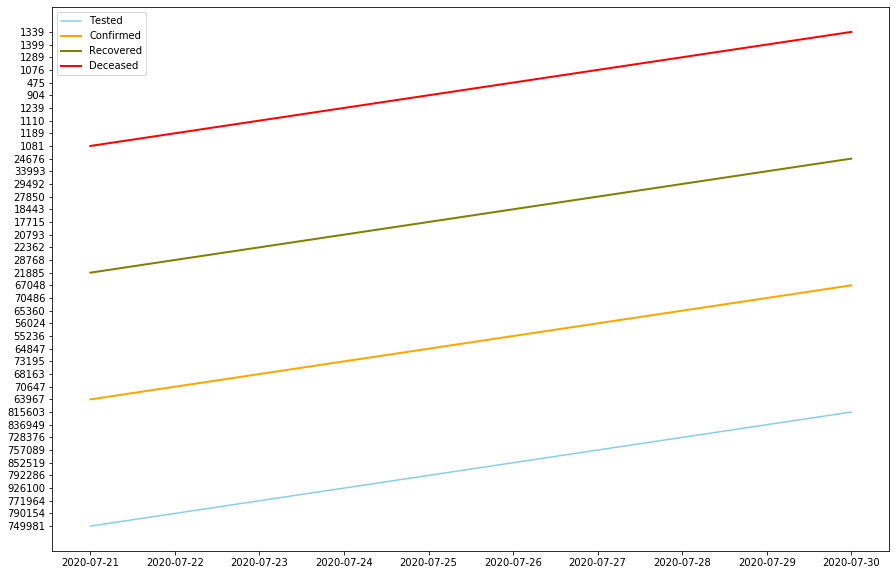

In [115]:
# To plot the values in a graph for the last 10 days
import matplotlib.pyplot as plt
 
# Data
df=pd.DataFrame({'x': covid_data2_usa['dateofrecord'], 'y1': covid_data2_usa['dailytested'],'y2': covid_data2_usa['dailyconfirmed'], 'y3': covid_data2_usa['dailyrecovered'], 'y4': covid_data2_usa['dailydeceased'] })
df=df[-10:]
plt.figure(figsize=(15,10))

# multiple line plot
plt.plot( 'x', 'y1', data=df, markerfacecolor='blue', color='skyblue',label="Tested")
plt.plot( 'x', 'y2', data=df, color='Orange', linewidth=2,label="Confirmed")
plt.plot( 'x', 'y3', data=df, color='olive', linewidth=2,label="Recovered")
plt.plot( 'x', 'y4', data=df, color='red', linewidth=2, label="Deceased")
plt.legend()

##### Exercise 3: To extract the data from documents (PDF)

Note: <br>
Data can be stored in documents & below explaination is to extract from PDF file. <br>
We used camelot library for the data extraction

In [117]:
#pip install camelot-py[cv]

In [79]:
import tkinter
import camelot

In [197]:
# Reading the pdf data using camelot library. Default stream is 'lattice'
covid_prediction_usa = camelot.read_pdf("COVID-forecasting-03252020_4.pdf", pages='26',flavor = 'stream')

In [198]:
covid_prediction_usa=covid_prediction_usa[0].df

In [199]:
covid_prediction_usa

,0,1,2,3,4,5,6,7,8,9,10
0,Table 1,,,,,,,,,,
1,State,Cumulative Deaths,Date of Peak Hospital Use,Beds Used at Peak,ICU Beds Used at Peak,Ventilators Used at Peak,Excess Bed Demand,Excess ICU Demand,Cumulative Bed Days,Cumulative ICU Days,Cumulative Ventilator Days
2,Alabama,1155 (622−1737),04/24/2020 (04/24/2020−04/24/2020),3628 (3079−4070),567 (480−641),307 (261−347),0 (0−0),93 (6−167),122930 (69537−180580),18274 (10010−27280),9869 (5404−14740)
3,Alaska,154 (62−264),04/26/2020 (04/27/2020−04/24/2020),524 (410−648),81 (62−102),44 (33−55),0 (0−0),27 (8−48),18417 (8104−30667),2725 (1138−4652),1473 (616−2528)
4,Arizona,1687 (1283−2133),04/19/2020 (04/18/2020−04/19/2020),5342 (4775−5842),842 (752−925),455 (405−499),0 (0−0),334 (244−417),176047 (134332−221524),26189 (19779−33218),14145 (10643−17991)
5,Arkansas,707 (367−1082),04/25/2020 (04/25/2020−04/27/2020),2183 (1841−2442),341 (285−385),184 (154−208),0 (0−0),0 (0−0),73840 (40262−110228),10982 (5809−16672),5930 (3137−9010)
6,California,6109 (778−17163),04/24/2020 (04/09/2020−04/30/2020),15242 (3131−38098),2318 (491−5787),1252 (264−3114),0 (0−11444),325 (0−3794),651881 (84753−1807008),96897 (12272−271432),52336 (6603−146542)
7,Colorado,940 (149−2412),04/28/2020 (04/16/2020−05/01/2020),2260 (532−4905),342 (81−747),185 (43−403),0 (0−54),0 (0−193),103530 (16353−262516),15368 (2363−39285),8297 (1268−21206)
8,Connecticut,773 (250−1824),04/10/2020 (04/08/2020−04/14/2020),3341 (1266−7631),541 (213−1232),292 (114−667),1603 (0−5893),442 (114−1133),80434 (26752−188243),11971 (3886−28287),6465 (2096−15317)
9,Delaware,228 (114−347),04/24/2020 (04/25/2020−04/24/2020),725 (605−809),113 (92−128),61 (50−70),29 (0−113),72 (51−87),23911 (12621−36026),3554 (1798−5475),1919 (965−2968)


In [200]:
covid_prediction_usa=covid_prediction_usa[1:]
covid_prediction_usa.reset_index(inplace=True,drop=True)

In [202]:
covid_prediction_usa.columns=covid_prediction_usa.iloc[0]

In [211]:
covid_prediction_usa.shape

(51, 11)

In [207]:
covid_prediction_usa=covid_prediction_usa.iloc[1:]
covid_prediction_usa.reset_index(inplace=True,drop=True)

In [208]:
covid_prediction_usa.head()

,State,Cumulative Deaths,Date of Peak Hospital Use,Beds Used at Peak,ICU Beds Used at Peak,Ventilators Used at Peak,Excess Bed Demand,Excess ICU Demand,Cumulative Bed Days,Cumulative ICU Days,Cumulative Ventilator Days
0,Alabama,1155 (622−1737),04/24/2020 (04/24/2020−04/24/2020),3628 (3079−4070),567 (480−641),307 (261−347),0 (0−0),93 (6−167),122930 (69537−180580),18274 (10010−27280),9869 (5404−14740)
1,Alaska,154 (62−264),04/26/2020 (04/27/2020−04/24/2020),524 (410−648),81 (62−102),44 (33−55),0 (0−0),27 (8−48),18417 (8104−30667),2725 (1138−4652),1473 (616−2528)
2,Arizona,1687 (1283−2133),04/19/2020 (04/18/2020−04/19/2020),5342 (4775−5842),842 (752−925),455 (405−499),0 (0−0),334 (244−417),176047 (134332−221524),26189 (19779−33218),14145 (10643−17991)
3,Arkansas,707 (367−1082),04/25/2020 (04/25/2020−04/27/2020),2183 (1841−2442),341 (285−385),184 (154−208),0 (0−0),0 (0−0),73840 (40262−110228),10982 (5809−16672),5930 (3137−9010)
4,California,6109 (778−17163),04/24/2020 (04/09/2020−04/30/2020),15242 (3131−38098),2318 (491−5787),1252 (264−3114),0 (0−11444),325 (0−3794),651881 (84753−1807008),96897 (12272−271432),52336 (6603−146542)


##### Exercise 4: To extract the data from RDBMS

In [43]:
# Currently using SQLite as the Data base to extract the data from a table.
# Please note connection string is required to connect to a DB from python. Based on the DB, connection string parameters varies such as port no, service ID etc.

In [24]:
# To connect to SQLite DB, below is the library required in python
import sqlite3

In [44]:
# Demo DB is the database name & Covid_data is the table name. Extracting the data from a DB table & further processing can be done in python
try:
    sqliteconnection = sqlite3.connect('D:\Sqlite_Database\Demo.db')
    cursor = sqliteconnection.cursor() # Cursor is the object to make a connection with the DB using the details passed.
    print("Database created and Successfully Connected to SQLite")
    
    sqlite_select_query='select * from Covid_Case_USA;' # This is the SQL query which interacts with DB 
    cursor.execute(sqlite_select_query)
    covid_cases_usa = pd.DataFrame(cursor.fetchall())
    col_name_list = [tuple[0] for tuple in cursor.description] # To extract the column names of the table
    covid_cases_usa.columns=col_name_list
    
    print("All the data is fetched into the Dataframe")
    cursor.close()

except sqlite3.Error as error:
    print("Error while connecting to sqlite", error)

# Close DB connection to be implemented in the finally block     
finally:
    if (sqliteconnection):
        sqliteconnection.close()
        print("The SQLite connection is closed")

Database created and Successfully Connected to SQLite
All the data is fetched into the Dataframe
The SQLite connection is closed


In [45]:
# Accessing the dataframe, which has the table data extracted from SqLite DB.
covid_cases_usa.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200730,AK,3559,221498,,45,,,,3,...,225057,1,0,d66445af73028a02a5d6713580a4c470cc603322,0,0,0,0,0,
1,20200730,AL,85762,594346,,1595,10070,,1129,,...,680108,27,177,5776f9724a3452e48705a9b2c73f52d3e631229d,0,0,0,0,0,
2,20200730,AR,41759,460958,,508,2747,,,108,...,502717,8,0,bd75bdc3753d8af0a8614e5c5b7091ff017bc1bf,0,0,0,0,0,
3,20200730,AS,0,1037,,,,,,,...,1037,0,0,2e44db50a98f764facdbbe5256f4c72a0ec98104,0,0,0,0,0,
4,20200730,AZ,170798,733156,,2348,11172,758,,531,...,903954,172,1112,655170e3baafd8660693233c3daf5a99250093d9,0,0,0,0,0,


In [173]:
covid_cases_usa.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable', 'fips',
       'positiveIncrease', 'negativeIncrease', 'total', 'totalTestResults',
       'totalTestResultsIncrease', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade'],
      dtype='object')

### Above are the multiple ways to extract the data from various sources in python. 